<a href="https://colab.research.google.com/github/FarahZayed/Qr-detector/blob/master/team%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **import** **libraries**

In [174]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image, ImageFilter
import math
from matplotlib import pyplot as plt
from skimage import io, color, filters, feature
from math import sqrt

# Read the image

In [272]:
#insert the path of the image

img = cv2.imread("/content/drive/MyDrive/testcases/CSE483 Sp24 Project Test Cases/02-Matsawar-3edel-ya3am.png", cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)


#  Function ma7tgnha

In [273]:
def angle_ABC(a, b, c):


    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

def find_bad_dists(hull, distance = 10):
    mask = []
    points, _, _ = hull.shape

    for i in range(points):
        # determine points to compare and make sure that last and first are compared too
        ai = i
        bi = (i+1)%points
        # x, y for both points
        x1 = hull[ai][0][0]
        y1 = hull[ai][0][1]
        x2 = hull[bi][0][0]
        y2 = hull[bi][0][1]

        #distance
        dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 )
        #build mask with distances out ot range
        if dist < distance:
            mask.append(bi)
    return mask



def find_bad_angles(hull, acute_angle = 30, obtuse_angle = 140):

    mask = []
    points, _, _ = hull.shape

    for i in range(points):
        # determine points to compare angle and make sure that last and first are compared too
        ai = i
        bi = (i+1)%points
        ci = (i+2)%points


        a = hull[ai][0]
        b = hull[bi][0]
        c = hull[ci][0]
        angle = angle_ABC(a, b, c)
        if angle > obtuse_angle or angle < acute_angle:
            mask.append(bi)
    return mask

def mark_points(hull):
    a_list=[]
    points, _, _ = hull.shape

    for i in range(points):
        r = int(np.random.randint(100,255,1)[0])
        g = int(np.random.randint(100,255,1)[0])
        b = int(np.random.randint(100,255,1)[0])
        a_list.append(tuple([hull[i][0][0], hull[i][0][1]]))

    return a_list



def shahd(img,thresh):

        invimg = invert_image(img)

        #invg = cv2.cvtColor(invimg,cv2.COLOR_RGB2GRAY)
        ret,thresh = cv2.threshold(invimg,127,255,0)

        contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      #  image =  invg = cv2.cvtColor(invimg,cv2.COLOR_GRAY2RGB)
        length = len(contours)
        cont = np.concatenate([contours[i] for i in range(length)], axis=0)

        cnt_len = cv2.arcLength(cont, True)
        cont = cv2.approxPolyDP(cont, .01*cnt_len, True)
        hull = cv2.convexHull(cont)


        mask = find_bad_dists(hull)
        hull = np.delete(hull, mask, axis=0)

        mask = find_bad_angles(hull)
        hull = np.delete(hull, mask, axis=0)

        a_list=mark_points(hull)

        uni_hull = []
        uni_hull.append(hull)


        shahdlist =  mark_points(hull)
        return shahdlist


In [274]:
def remove_quietnoise(img):
    start_row = -1
    start_col = -1
    end_row = -1
    end_col = -1
    for row_index, row in enumerate(img):
     for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
     if start_row != -1:
        break
    for row_index, row in enumerate(img[::-1]):
     for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
     if end_row != -1:
        break
    for col_index, col in enumerate(cv2.transpose(img)):
     for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
     if start_col != -1:
        break
    for col_index, col in enumerate(cv2.transpose(img)[::-1]):
     for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
     if end_col != -1:
        break




    qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
    return qr_no_quiet_zone

    fig = plt.figure(figsize=(5, 5));
    plt.xticks([], []);
    plt.yticks([], []);
    fig.get_axes()[0].spines[:].set_color('red');
    fig.get_axes()[0].spines[:].set_linewidth(40);
    fig.get_axes()[0].spines[:].set_position(("outward", 20))
    plt.title('QR code without quiet zone', y = 1.15, color='red');
    plt.imshow(qr_no_quiet_zone, cmap='gray');




def distance(point1, point2):
    return sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)


def butterworthLP(D0, imgShape, n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            base[y, x] = 1 / (1 + (distance((y, x), center) / D0) ** (2 * n))
    return base








def get_start_row_col(img):
    start_row = -1
    start_col = -1
    for row_index, row in enumerate(img):
        for pixel in row:
            if pixel != 255:
                start_row = row_index
                break
        if start_row != -1:
            break
    for col_index, col in enumerate(cv2.transpose(img)):
        for pixel in col:
            if pixel != 255:
                start_col = col_index
                break
        if start_col != -1:
            break
    return start_row, start_col


def getcellsizeForRotation(imgremove):
    size=0
    for pixel in imgremove[-1, ::-1]:
      if (pixel != 0): break
      size += 1
    if(size ==0): return 0,0
    grid_cell_size = round(size/7)
    grid_cells_num = round(imgremove.shape[0]/grid_cell_size)
    return grid_cell_size,grid_cells_num

def getqrcell(remove):
    if remove.shape[0] % grid_cell_size != 0 or remove.shape[1] % grid_cell_size != 0:
            print("Warning: Grid cell size resulted in fraction. Adjusting...")
            img_resized = cv2.resize(remove, (924, 924))

    # If the resized image is larger than the target size, crop it
            if remove.shape[0] > 924 or remove.shape[1] > 924:
                remove = img_resized[:924, :924]
            else:
                remove = img_resized
    try:
            qr_cells = remove.reshape((
            grid_cells_num,
            grid_cell_size,
            grid_cells_num,
            grid_cell_size,
            )).swapaxes(1, 2)

    except ValueError:
        print("Error: Unable to reshape image into grid cells.")
        qr_cells=0
    return qr_cells

def correctqrcell(qr_cells):

 for i in range(qr_cells.shape[0]):
   for j in range(qr_cells.shape[1]):
    cell=qr_cells[i][j]
    white_pixel_count = np.sum(cell == 255)
    black_pixel_count = np.sum(cell == 0)
    if white_pixel_count > black_pixel_count:
        for k in range(grid_cell_size):
            for l in range(grid_cell_size):
                qr_cells[i][j][k][l]=255
    elif black_pixel_count > white_pixel_count:
        for k in range(grid_cell_size):
            for l in range(grid_cell_size):
                qr_cells[i][j][k][l]=0


    elif black_pixel_count == white_pixel_count:
        for k in range(grid_cell_size):
            for l in range(grid_cell_size):
                qr_cells[i][j][k][l]=0
    return qr_cells


# function that raise the flags

In [275]:
#Note: rotation hat crash fi sorten 3ashan el binrization bytl3 kolo aswd aw kolo abyd fa mmken na3ml binarize 7asb el case
#mesh 3arfa nashof?? PLUS el banana mafrod ttl3 anha rotated!!! mesh 3arf bardo
def checkrotation(img):
    imgremove= remove_quietnoise(img)
    grid_cell_size,grid_cell_num= getcellsizeForRotation(imgremove)

    if grid_cell_size==0:
        print("The image is not rotated it may have some other noise that must be solved first!!!")
        return False
    inverted_img = cv2.bitwise_not(imgremove)
    shapeofste=3*grid_cell_size -1
    se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (shapeofste, shapeofste))
    _, se_binarized = cv2.threshold(se_rect, 128, 1, cv2.THRESH_BINARY)
    se_binarized = se_binarized.astype(int)
    se_binarized[se_binarized == 0] = -1
    erosion = cv2.erode(inverted_img, se_rect, iterations=1)
    partwithrotato=erosion[(imgremove.shape[0]-7*grid_cell_size):imgremove.shape[0], imgremove.shape[1]-7*grid_cell_size:imgremove.shape[1]];
    count=0
    for row in range(partwithrotato.shape[0]):
        for col in range(partwithrotato.shape[1]):
            if partwithrotato[row,col] == 255:
                count=count+1
    if(count>0 and count<10):
        return True
    return False


def checkblured(image):
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20*np.log(np.abs(f_transform_shifted))
    rows, cols = image.shape
    center_row = rows // 2
    center_col = cols // 2
    roi_size = 10
    dc_component = magnitude_spectrum[center_row, center_col]
    roi = magnitude_spectrum[center_row - roi_size:center_row + roi_size + 1,
                              center_col - roi_size:center_col + roi_size + 1]
    avg_roi = round(np.mean(roi))
    if(np.mean(magnitude_spectrum[100:-100, 100:-100])== float('-inf')):
        return False
    else:
        high_freq_avg=round(np.mean(magnitude_spectrum[100:-100, 100:-100]))

    low_accepted_freqcompatcenter=290
    highest_accepted_change=120
    if(avg_roi>290 and high_freq_avg<120):
        return True
    else:
        return False
#check mostly white
def is_mostly_white(img):
    row, col = img.shape
    count=0
    plt.show()
    for i in range(row):
        for j in range(col):
            if (img[i][j] < 180) or (img[i][j] > 230) :
                count=count+1
    if count>0:
       return False
    else:
        return True

#check shifting

def detect_shift_rows(img):
    row,col=get_start_row_col(img)
    print(row,col)
    count_black =0
    count_white =0
    flag=True
    first_black_pixel = 0
    last_black_pixel = 0
    for i in range(len(img[row])-1):
        if img[row][i] !=255:
            first_black_pixel = i
            count_black=count_black+1
        if count_black==1:
            break
    for j in range(first_black_pixel,len(img[row])-1):
        if img[row][j]!=0:
            last_black_pixel=j-1
            count_white+=1
        if count_white==1:
            break
    for k in range(first_black_pixel,last_black_pixel):
       if img[row][k]!=0:
          flag=False


    if row>0 and col>0 and col!=0 and row!=0 and col!=row and flag==True:
        if (row-col)<12:
            return True
        else:
          return False
    else:
          return False


#checks skewness
def checkskew(img):
    skewflag=False
    unwarpedflag=False
    img = np.uint8(img)
    edges = cv2.Canny(img, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if(contours ==() ):
        return skewflag,unwarpedflag
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    qr_code_region = img[y:y + h, x:x + w]
    edges = cv2.Canny(qr_code_region, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
    if lines is None:
        return skewflag,unwarpedflag
    vertical_angles = []
    horizontal_angles = []

    for line in lines:
        rho, theta = line[0]
        if np.pi / 4 < theta < 3 * np.pi / 4:
            vertical_angles.append(theta)
        else:
            horizontal_angles.append(theta)
    vertical_skewness = np.mean(vertical_angles) if vertical_angles else 0
    horizontal_skewness = np.mean(horizontal_angles) if horizontal_angles else 0

    vertical_skewness_deg = round(np.rad2deg(vertical_skewness))
    horizontal_skewness_deg = round(np.rad2deg(horizontal_skewness))
    difference=round(abs(horizontal_skewness_deg - vertical_skewness_deg))
    if(difference==90 and vertical_skewness_deg!=90 and horizontal_skewness_deg!=90):
        skewflag=True
        return skewflag,unwarpedflag
    elif(horizontal_skewness_deg < 90 and horizontal_skewness_deg>10 and vertical_skewness_deg<90):
        unwarpedflag=True
        return skewflag,unwarpedflag
    else:
        return skewflag,unwarpedflag


#check black image
def is_mostly_black(image):
    image = np.uint8(image)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    hist /= hist.sum()

    cumulative_sum = hist.cumsum()

    return cumulative_sum.argmax() < 30

def checkflip(img):
    # if imgremove.shape[0] % grid_cell_size != 0 or imgremove.shape[1] % grid_cell_size != 0:
    #     print("Warning: Grid cell size resulted in fraction. Adjusting...")
    #     img_resized = cv2.resize(imgremove, (924, 924))
    #   # If the resized image is larger than the target size, crop it
    #     if img_resized.shape[0] > 924 or img_resized.shape[1] > 924:
    #         imgremove = img_resized[:924, :924]
    #     else:
    #         imgremove = img_resized

    if(checkrotation(img)==False):
        return False
    img= cv2.flip(img, 1)
    if(checkrotation(img) ==False):
        return True
    return False

def inversioncheck(img):
    mean_intensity = cv2.mean(img)[0]
    #MESH GENERIC WALA EHHH
    return (mean_intensity < 100 and mean_intensity>30)


def detect_periodic_noise(image,threshold_factor=1 / 4):

    fft_image = np.fft.fft2(image)
    max_intensity = np.max(fft_image)
    print("Maximum value of the whole image", max_intensity)
    horizontal_component = np.abs(np.fft.fftshift(fft_image)[:, :fft_image.shape[1] // 2])
    max_horizontal_component = np.max(horizontal_component)
    print("Maximum value of horizontal component:", max_horizontal_component)
    noise_threshold = max_intensity * threshold_factor
    if max_horizontal_component > noise_threshold:
        return True
    else:
        return False


def detect_patterns_in_roi(image, threshold_factor=1.2):
    dft_noise = np.fft.fft2(image)
    dft_noise_shift = np.fft.fftshift(dft_noise)
    magnitude_spectrum = 20 * np.log(np.abs(dft_noise_shift))
    # Find the center of the frequency spectrum (DC component)
    rows, cols = dft_noise_shift.shape
    center_row, center_col = rows // 2, cols // 2

    # Define a region of interest (ROI) around the DC component
    roi_size = 200 # Adjust the size of the ROI as needed
    roi = magnitude_spectrum[center_row - roi_size:center_row + roi_size,
                          center_col - roi_size:center_col + roi_size]


    # Calculate the mean magnitude within the ROI
    roi_mean = np.mean(roi)

    # Calculate the threshold for significant peaks
    threshold = threshold_factor * roi_mean

    # Check if any peak exceeds the threshold
    significant_peaks_exist = np.any(roi > threshold)
    if significant_peaks_exist:
        return False
    else:
        return True



# flags to do preprocessing

In [276]:
rotationflag= checkrotation(img)

SaltandPepper = detect_patterns_in_roi(img)

bluredflag =checkblured(img)

shiftedrowsflag= detect_shift_rows(img)

mostlywhiteflag= is_mostly_white(img)

periodicflag = detect_periodic_noise(img)

skewedflag,unwarpedflag = checkskew(img)

mostlyblackflag=is_mostly_black(img)

inversionflag=inversioncheck(img)

flipflag =checkflip(img)

print("The flag of inverted image : ",inversionflag )
print("The flag of rotation: ",rotationflag )
print("The flag of all white image: ",mostlywhiteflag )
print("The flag of blured image: ",bluredflag )
print("The flag of shifted rows: ",shiftedrowsflag )
print("The flag of periodic noise: ",periodicflag )
print("The flag of skewed images : ",skewedflag )
print("The flag of all black image : ",mostlyblackflag )
print("The flag of unwarped image : ",unwarpedflag )
print("The flag of flipped image : ",flipflag )
print("The flag of saltandpepper image : ",SaltandPepper )

The image is not rotated it may have some other noise that must be solved first!!!
0 0
Maximum value of the whole image (157628537+0j)
Maximum value of horizontal component: 17606593.887560166
The image is not rotated it may have some other noise that must be solved first!!!
The flag of inverted image :  False
The flag of rotation:  False
The flag of all white image:  False
The flag of blured image:  False
The flag of shifted rows:  False
The flag of periodic noise:  False
The flag of skewed images :  True
The flag of all black image :  False
The flag of unwarped image :  False
The flag of flipped image :  False
The flag of saltandpepper image :  False


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Function responsible for preprocessing

In [277]:
def invert_image(image):
    # inverted_gray = 255 - image
    # inverted_image = cv2.cvtColor(inverted_gray, cv2.COLOR_GRAY2BGR)
    _,img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)
    inverted_image=cv2.bitwise_not(img)
    return inverted_image

def a3dlrotation(img):
    print("in")
    imgremove= remove_quietnoise(img)
    while(checkrotation(imgremove)):
        imgremove = cv2.rotate(imgremove, cv2.ROTATE_90_CLOCKWISE)
    return imgremove
def flip(img):
    while(checkflip(img)):
     img=cv2.flip(img,1)
    return img

def nadafblured(img):
         # nazbt el soraa
        blurred = cv2.GaussianBlur(img, (7, 7), 0)
        sharpened = cv2.addWeighted(img, 2.5, blurred, -0.5, 0)
        _, thresh_img = cv2.threshold(sharpened, 127, 255, cv2.THRESH_BINARY)
        #shalena el noise w shwait araf erode keda
        remove= remove_quietnoise(thresh_img)
        se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
        _, se_binarized = cv2.threshold(se_rect, 128, 1, cv2.THRESH_BINARY)
        se_binarized = se_binarized.astype(int)
        se_binarized[se_binarized == 0] = -1
        erosion = cv2.erode(remove, se_binarized, iterations=1)
        needcorrectionimg=erosion
        return needcorrectionimg

def unwarped(img,thresh):
        listt  = shahd(img,thresh)
        rows1 , cols1  = img.shape
        pts2 = np.array([[cols1,rows1],[0,rows1],[0,0], [cols1,0]],np.float32)
        pts1 = np.array(listt,np.float32)
        M = cv2.getPerspectiveTransform(pts1,pts2)
        dst = cv2.warpPerspective(img,M,(cols1,rows1))
        return dst


def edit_white_img(img):
    first_pixel=img[0,0]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] == first_pixel:
                img[i][j] = 225
            else:
                img[i][j] = 0
    return img



def solve_shifted_rows(img):
    start_row = -1
    start_col = -1
    end_row = -1
    end_col = -1
    _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    for row_index, row in enumerate(img):
        for pixel in row:
            if pixel != 255:
                start_row = row_index
                start_col =row_index
                break
        if start_row != -1:
            break

    for row_index, row in enumerate(img[::-1]):
        for pixel in row:
            if pixel != 255:
                end_row = img.shape[0] - row_index
                end_col =img.shape[0] - row_index
                break
        if end_row != -1:
            break


    qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]

    size = 0
    for pixel in qr_no_quiet_zone[0]:
        if (pixel != 0): break
        size += 1

    grid_cell_size = round(size/7)
    grid_cells_num = round(qr_no_quiet_zone.shape[0]/grid_cell_size)

    img_resized = cv2.resize(qr_no_quiet_zone, (grid_cells_num*grid_cell_size, grid_cells_num*grid_cell_size))

    qr_cells = img_resized.reshape((
        grid_cells_num,
        grid_cell_size,
        grid_cells_num,
        grid_cell_size,
    )).swapaxes(1, 2)

    # BRWANA 3AYZHA HENA LEHHH
    for i in range(qr_cells.shape[0]):
        for j in range(qr_cells.shape[1]):
            cell=qr_cells[i][j]
            white_pixel_count = np.sum(cell == 255)
            black_pixel_count = np.sum(cell == 0)
            if white_pixel_count > black_pixel_count:
                for k in range(grid_cell_size):
                    for l in range(grid_cell_size):
                        qr_cells[i][j][k][l]=255
            elif black_pixel_count > white_pixel_count:
                for k in range(grid_cell_size):
                    for l in range(grid_cell_size):
                        qr_cells[i][j][k][l]=0


            elif black_pixel_count == white_pixel_count:
                for k in range(grid_cell_size):
                    for l in range(grid_cell_size):
                        qr_cells[i][j][k][l]=0
    return img_resized


def dalma(image):
        image1 = image
        thresh,binary_image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY_INV)
        image = cv2.inpaint(image1, binary_image, inpaintRadius=3,flags=cv2.INPAINT_TELEA)



        mask = cv2.threshold(image, 10, 255, cv2.THRESH_BINARY)[1]

        lightened_image = np.where(mask == 255, np.clip(image * 100, 0, 255).astype(np.uint8), image)

        _, mask = cv2.threshold(lightened_image, 75, 255, cv2.THRESH_BINARY)

        mask = cv2.bitwise_not(mask)

        _, bimage = cv2.threshold(lightened_image, 0, 255, cv2.THRESH_BINARY)
        return bimage

def orientSkewness(img):
        _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
        edges = cv2.Canny(img, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        qr_code_region = img[y:y + h, x:x + w]
        # Apply edge detection
        edges = cv2.Canny(qr_code_region, 50, 150, apertureSize=3)
        lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
        vertical_angles = []
        horizontal_angles = []

        for line in lines:
            rho, theta = line[0]
            if np.pi / 4 < theta < 3 * np.pi / 4:
                vertical_angles.append(theta)
            else:
                horizontal_angles.append(theta)

        vertical_skewness = np.mean(vertical_angles) if vertical_angles else 0
        horizontal_skewness = np.mean(horizontal_angles) if horizontal_angles else 0

        vertical_skewness_deg = np.rad2deg(vertical_skewness)
        horizontal_skewness_deg = np.rad2deg(horizontal_skewness)

        rotation_angle_deg = 180+horizontal_skewness_deg
        rows, cols = img.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle_deg, 1)
        img = cv2.warpAffine(img, rotation_matrix, (cols, rows), flags=cv2.INTER_LINEAR,
                                    borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255) )

        qr_code_region = cv2.warpAffine(qr_code_region, rotation_matrix, (cols, rows), flags=cv2.INTER_LINEAR,
                            borderMode=cv2.BORDER_CONSTANT)

        contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv2.contourArea)
        rect = cv2.minAreaRect(largest_contour)
        angle = rect[-1]
        if angle < -45:
            angle += 90

        rows, cols = img.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D(rect[0], angle, 1)
        rotated_image = cv2.warpAffine(img, rotation_matrix, (cols, rows), flags=cv2.INTER_LINEAR,
                                    borderMode=cv2.BORDER_REPLICATE)

        border_width = 20  # Adjust the border width as needed
        border_color = (255, 255, 255)  # White color
        img = cv2.copyMakeBorder(img, border_width, border_width, border_width, border_width,
                                            cv2.BORDER_CONSTANT, value=border_color)
        if(checkrotation(img)):
            img=a3dlrotation(img)
            return img
        else: return img


def decompresso_espreso(img):
    # convert to binary image
    _, imgBinary = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)

    # apply Gaussian blur to smooth the image
    blurred = cv2.GaussianBlur(imgBinary, (5, 5), 0)

    # opening--> erosion then dilation 3ashan asheel el abyad and did finetuning till weselt le number of iterations da
    # a 5x5 kernel of ones (3x3 msh hatenfa3)
    kernel = np.ones((5,5),np.uint8)
    eroded = cv2.erode(blurred, kernel, iterations = 6)
    dilated = cv2.dilate(eroded, kernel, iterations = 7)
    return dilated


def periodicnoiseSolver(img):
    fourier_transform = np.fft.fft2(img)
    center_shift = np.fft.fftshift(fourier_transform)
    epsilon = 1e-10  # A small constant to avoid zero values
    fourier_noisy = 20 * np.log(np.abs(center_shift)+epsilon)

    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    # horizontal mask
    center_shift[crow :crow + 1, 0:ccol - 10] = 1
    center_shift[crow :crow + 1, ccol + 10:] = 1
    # vertical mask
    # center_shift[:crow - 10, ccol - 4:ccol + 4] = 1
    # center_shift[crow + 10:, ccol - 4:ccol + 4] = 1

    filtered = center_shift * butterworthLP(80, img.shape, 10)

    f_shift = np.fft.ifftshift(center_shift)
    denoised_image = np.fft.ifft2(f_shift)
    denoised_image = np.real(denoised_image)

    f_ishift_blpf = np.fft.ifftshift(filtered)
    denoised_image_blpf = np.fft.ifft2(f_ishift_blpf)
    denoised_image_blpf = np.real(denoised_image_blpf)

    fourier_noisy_noise_removed = 20 * np.log(np.abs(center_shift)+epsilon)
    _, denoised_image_blpf_bin = cv2.threshold(denoised_image_blpf, 128, 255, cv2.THRESH_BINARY)
    return denoised_image_blpf_bin





# Read the QR code image

# Apply Gaussian blur
def denoiseSaltPepper(image):
      blurred_image = cv2.GaussianBlur(image, (1, 1), 0)
      equalized_image = cv2.equalizeHist(blurred_image)
      # Compute the Fourier Transform
      f_transform = np.fft.fft2(image)
      f_transform_shifted = np.fft.fftshift(f_transform)
     # Create a rectangular mask
      rect_width = 150
      rect_height = 20
      rows, cols = image.shape
      mask_rect = np.zeros((rows, cols), dtype=np.uint8)
      center_row, center_col = rows // 2, cols // 2
      start_row = center_row - rect_height // 2
      start_col = center_col - rect_width // 2
      end_row = start_row + rect_height
      end_col = start_col + rect_width
      mask_rect[start_row:end_row, start_col:end_col] = 1
      # Create a rectangular mask
      rect_width2 = 20
      rect_height2 = 150
      rows, cols = image.shape
      mask_rect2 = np.zeros((rows, cols), dtype=np.uint8)
      center_row, center_col = rows // 2, cols // 2
      start_row = center_row - rect_height2 // 2
      start_col = center_col - rect_width2 // 2
      end_row = start_row + rect_height2
      end_col = start_col + rect_width2
      mask_rect2[start_row:end_row, start_col:end_col] = 1
      # circular mask
      rows, cols = image.shape
      center_row, center_col = rows // 2, cols // 2
      radius_inner_circle = 0  # Radius for the central circular region (DC component)
      radius_outer_circle = 30  # Radius for the outer annular region (bandpass filter)
      mask_circle = np.zeros((rows, cols), dtype=np.uint8)
      for i in range(rows):
          for j in range(cols):
              distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
              if distance <= radius_outer_circle and distance >= radius_inner_circle:
                  mask_circle[i, j] = 1

      mask=mask_rect|mask_rect2|mask_circle

      # Apply the bandpass filter
      f_transform_filtered = f_transform_shifted *mask

      # f_transform_filtered = f_transform_shifted * mask_circle
      filtered_image = np.fft.ifftshift(f_transform_filtered)
      filtered_image = np.fft.ifft2(filtered_image)
      filtered_image = np.abs(filtered_image)

      # Apply inverse Fourier Transform to obtain the filtered image
      filtered_image = np.fft.ifftshift(f_transform_filtered)
      filtered_image = np.fft.ifft2(filtered_image)
      filtered_image = np.abs(filtered_image)
      _, filtered_image = cv2.threshold(filtered_image, 128, 255, cv2.THRESH_BINARY)
      # inverted_image = cv2.bitwise_not(filtered_image)

      filtered_image = filtered_image.astype(np.uint8)
      closing_kernel = np.ones((11,11), np.uint8)
      closed_image= cv2.morphologyEx(filtered_image, cv2.MORPH_CLOSE, closing_kernel)

      # erosion
      closed_image = np.array(closed_image)
      closed_image = closed_image.astype(np.uint8)
      kernel = np.ones((9,9), np.uint8)  # You can adjust the size of the kernel as needed
      eroded_image = cv2.erode(closed_image, kernel, iterations=1)

      # ASEEEB EL PLOTS WALA LA YA GAM3A???? EL MO3EED 3AYZ YESHOFHA SA7?
      # print(result_image.shape)
      return eroded_image




# Preprocessing

In [278]:
imgafterpreproc=img

if(rotationflag==True):
    imgafterpreproc= a3dlrotation(img)

if(bluredflag==True):
    imgafterpreproc= nadafblured(img)

if(mostlywhiteflag==True):
    imgafterpreproc=edit_white_img(img)

if(shiftedrowsflag==True):
    imgafterpreproc = solve_shifted_rows(img)

if(mostlyblackflag==True):
    imgafterpreproc=dalma(img)

if(skewedflag ==True):
    imgafterpreproc=orientSkewness(img)

if (periodicflag==True):
    imgafterpreproc=periodicnoiseSolver(img)

if(unwarpedflag ==True):
    print("tmm")
    imgafterpreproc=unwarped(img,thresh)
    print("tmm2")
    plt.imshow(imgafterpreproc,cmap='gray')
#ba2et el if
# plt.imshow(imgafterpreproc,cmap='gray')

The image is not rotated it may have some other noise that must be solved first!!!


periodic6
The image is not rotated it may have some other noise that must be solved first!!!
The image is not rotated it may have some other noise that must be solved first!!!
20 20
Maximum value of the whole image (179928467-6.446498446166515e-09j)
Maximum value of horizontal component: 22334833.542319205
False


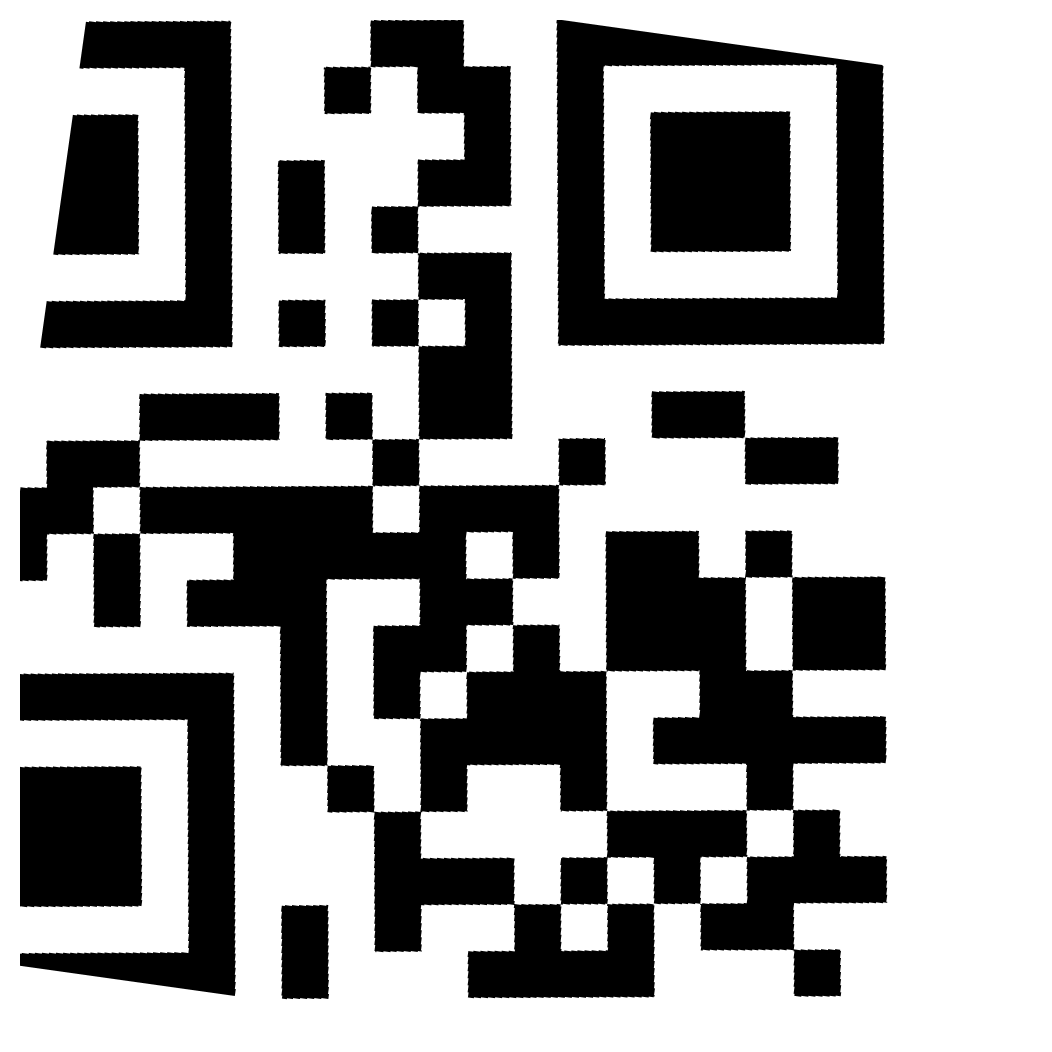

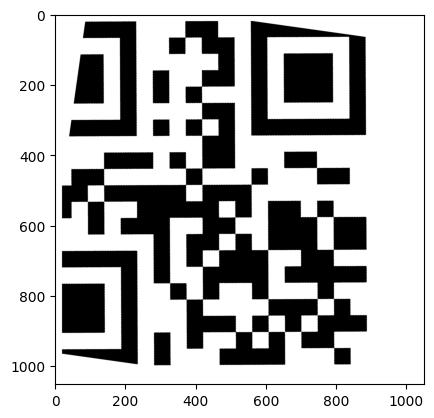

In [279]:
imgafterpreproc=img
while(rotationflag or bluredflag or inversionflag or mostlywhiteflag or shiftedrowsflag or mostlyblackflag or skewedflag or unwarpedflag or periodicflag or flipflag or SaltandPepper):
    if(inversionflag == True):
        imgafterpreproc=invert_image(imgafterpreproc)

    if(rotationflag==True):
        print("periodic4")
        imgafterpreproc= a3dlrotation(imgafterpreproc)

    if(bluredflag==True):
        print("periodic3")
        imgafterpreproc= nadafblured(imgafterpreproc)

    if(mostlywhiteflag==True):
        print("periodic2")
        imgafterpreproc=edit_white_img(imgafterpreproc)

    if(shiftedrowsflag==True):
        print("periodic1")
        imgafterpreproc = solve_shifted_rows(imgafterpreproc)

    if(periodicflag==True):
        print("periodic")
        imgafterpreproc=periodicnoiseSolver(imgafterpreproc)

    if(mostlyblackflag==True):
        print("periodic5")
        imgafterpreproc=dalma(imgafterpreproc)

    if(skewedflag ==True):
        print("periodic6")
        imgafterpreproc=orientSkewness(imgafterpreproc)

    if(unwarpedflag ==True):
        print("periodic7")
        _,thresh = cv2.threshold(imgafterpreproc, 128, 255, cv2.THRESH_BINARY)
        imgafterpreproc=unwarped(imgafterpreproc,thresh)

    if(flipflag == True):
        print("periodic8")
        imgafterpreproc=flip(imgafterpreproc)

    if(SaltandPepper ==True):
        print("periodic9")
        imgafterpreproc=denoiseSaltPepper(imgafterpreproc)




    rotationflag= checkrotation(imgafterpreproc)

    SaltandPepper = detect_patterns_in_roi(imgafterpreproc)

    bluredflag = checkblured(imgafterpreproc)

    shiftedrowsflag= detect_shift_rows(imgafterpreproc)

    mostlywhiteflag= is_mostly_white(imgafterpreproc)

    skewedflag,unwarpedflag = checkskew(imgafterpreproc)

    periodicflag=detect_periodic_noise(imgafterpreproc)


    mostlyblackflag=is_mostly_black(imgafterpreproc)
    print(mostlyblackflag)

    inversionflag=inversioncheck(imgafterpreproc)

    # flipflag=checkflip(imgafterpreproc)
    cv2_imshow(imgafterpreproc)



plt.imshow(imgafterpreproc,cmap='gray')

# **Reshape** hy5osh 3ala decode

In [ ]:
#later note:mmken nb2a nashel el condition el zayda wala ba an el sora ela 7ad ma htro7 mazbota shwia

def getimageafterreshape(img):
    #dah 3ak ATSRFYYYY
    if(img[0][0]==255):
        imgremove,_,_ = remove_quietnoise(img)

    else:
        inverted_img = cv2.bitwise_not(img)            #noha 3ayza el invert hena
        imgremove,_,_ = remove_quietnoise(inverted_img)

    size = 0

    #h8yr hena leh 3ashan el taree2 dih mesh htnf3 3ala kol el sewar zay el rotated fa ana h7sb el 3aded el pixel bel change w inshallah 5er
    if(imgremove[0][0]==255):
        for pixel in imgremove[-1, ::-1]:
         if (pixel != 0): break
         size += 1

    else:
        for pixel in imgremove[0]:
         if (pixel != 0): break
         size += 1
    grid_cell_size = round(size/7)
    print(grid_cell_size)
    grid_cells_num = round(imgremove.shape[0]/grid_cell_size)
    print(grid_cells_num)
    #NOHAAA
    if imgremove.shape[0] % grid_cell_size != 0 or imgremove.shape[1] % grid_cell_size != 0:
        print("Warning: Grid cell size resulted in fraction. Adjusting...")
        img_resized = cv2.resize(imgremove, (924, 924))

# If the resized image is larger than the target size, crop it

        if img_resized.shape[0] > 924 or img_resized.shape[1] > 924:
            imgremove = img_resized[:924, :924]
        else:
            imgremove = img_resized


            #cv2_imshow(imgremove)

    try:

        qr_cells = imgremove.reshape((
        grid_cells_num,
        grid_cell_size,
        grid_cells_num,
        grid_cell_size,
        )).swapaxes(1, 2)
        plt.imshow(imgremove,cmap='gray')
        _, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
        for i, row in enumerate(axes):
          for j, col in enumerate(row):
              col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
              col.get_xaxis().set_visible(False)
              col.get_yaxis().set_visible(False)
              col.spines[:].set_color('red')


        return qr_cells,grid_cells_num,grid_cell_size,imgremove

    except ValueError:
        print("Error: Unable to reshape image into grid cells.")
        return "none",grid_cells_num,grid_cell_size,imgremove



#plt.imshow(imgremove,cmap='gray')

#salama
# print(size)
# grid_cell_size = round(size/7)
# print(grid_cell_size)
# grid_cells_num = round(imgremove.shape[0]/grid_cell_size)
# print(grid_cells_num)
# qr_cells = imgremove.reshape((
#     grid_cells_num,
#     grid_cell_size,
#     grid_cells_num,
#     grid_cell_size,
# )).swapaxes(1, 2)
# plt.imshow(imgremove,cmap='gray')
# _, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
# for i, row in enumerate(axes):
#     for j, col in enumerate(row):
#         col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
#         col.get_xaxis().set_visible(False)
#         col.get_yaxis().set_visible(False)
#         col.spines[:].set_color('red')


# Decode

In [ ]:
def change_binary(qr_cell,grid_cell_num):
    qr_cells_numeric = np.ndarray((grid_cells_num, grid_cells_num), dtype=np.uint8)
    for i, row in enumerate(qr_cells):
        for j, cell in enumerate(row):
            qr_cells_numeric[i, j] = (np.median(cell) // 255)
    return qr_cells_numeric

In [ ]:
def getecl(qr_cells_numeric):
    qr_cells_numeric[8]
    # The first two bits determine the error correction level
    # Level L (Low)         [11]	7%  of data bytes can be restored.
    # Level M (Medium)      [10]	15% of data bytes can be restored.
    # Level Q (Quartile)    [01]	25% of data bytes can be restored.
    # Level H (High)        [00]	30% of data bytes can be restored.
    ecl = [int(not(c)) for c in qr_cells_numeric[8, 0:2]]
    # Why "not"? Because the standard uses '1's for black and '0's for white
    #
    # "A dark module is a binary one and a light module is a binary zero."
    #  - ISO/IEC 18004:2000(E)
    #
    # In image processing, we use them the other way.. Hence the inversion
    return ecl

def get_mask(qr_cells_numeric):
    # Dictionary of all masks and their equivalent formulae
    # Same row as above, the three cells after the ecl cells (converted to a string)
    mask = [int(not(c)) for c in qr_cells_numeric[8, 2:5]]
    mask_str = ''.join([str(c) for c in mask])
    return mask,mask_str

def get_fec(qr_cells_numeric):
    fec = []
    fec.append(qr_cells_numeric[8, 5])
    fec.append(qr_cells_numeric[8, 7])
    fec.extend(qr_cells_numeric[0:6, 8])
    fec.extend(qr_cells_numeric[7:9, 8])
    fec = [int(not(c)) for c in fec]
    return fec


#def showneededpixel(qr_cells_numeric):
#    _, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
#    for i, row in enumerate(axes):
#        for j, col in enumerate(row):

            # col.get_xaxis().set_visible(False)
            # col.get_yaxis().set_visible(False)
            # if (i == 8 and j <= 8) or (i <= 8 and j == 8):
            #     if (i != 6) and (j != 6):
            #         col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
            #         col.spines[:].set_color('red')
            #         continue
            # col.imshow(qr_cells[i][j], cmap="gray", vmin=-1275, vmax=510)

In [ ]:
def makeinfo(ecl,mask,fec):
    ecl[0] ^= 1
    mask[0] ^= 1
    mask[2] ^= 1
    fec[5] ^= 1
    fec[8] ^= 1

# Before we proceed, let's write a function for masking to make our lives easier


def apply_mask(qr_cells_numeric,data_start_i, data_start_j, direction,UP,DOWN,CW,CCW,UP_ENC,MASKS,mask_str):

    '''
    data_start_i/j represent the first cell's coords in its respective direction
    direction is the masking direction, up(-enc)/down/clockwise/anti-clockwise
    '''

    result = []
    row_offsets = []
    col_offsets = []
    if (direction in [UP, UP_ENC]):
        row_offsets = [0,  0, -1, -1, -2, -2, -3, -3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == DOWN):
        row_offsets = [0,  0,  1,  1,  2,  2,  3,  3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == CW):
        row_offsets = [0,  0,  1,  1,  1,  1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    if (direction == CCW):
        row_offsets = [0,  0, -1, -1, -1, -1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]

    for i, j in zip(row_offsets, col_offsets):
        cell = qr_cells_numeric[data_start_i+i, data_start_j+j]
        result.append(int(cell if MASKS[mask_str](data_start_i+i, data_start_j+j) else not cell))

    return result[:4] if direction == UP_ENC else result
# enc = apply_mask(grid_cells_num-1, grid_cells_num-1, UP_ENC)
# len = apply_mask(grid_cells_num-3, grid_cells_num-1, UP)
# print(len)

In [ ]:
def decode(qr_cells,grid_cells_num):
    MASKS = {
        "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
        "001": lambda i, j: (i / 2 + j / 3) % 2 == 0,
        "010": lambda i, j: ((i * j) % 3 + i + j) % 2 == 0,
        "011": lambda i, j: ((i * j) % 3 + i * j) % 2 == 0,
        "100": lambda i, j: i % 2 == 0,
        "101": lambda i, j: (i + j) % 2 == 0,
        "110": lambda i, j: (i + j) % 3 == 0,
        "111": lambda i, j: j % 3 == 0,
    }
    UP, UP_ENC, DOWN, CW, CCW = range(5)  # A rather old-fashioned pythonic "Enum"
    qr_cells_numeric=change_binary(qr_cells,grid_cells_num)
    ecl=getecl(qr_cells_numeric)
    mask,mask_str=get_mask(qr_cells_numeric)
    fec=get_fec(qr_cells_numeric)
    #showneededpixel(qr_cells_numeric)
    makeinfo(ecl,mask,fec)

    data_starting_indices = [
    [grid_cells_num-7, grid_cells_num-1, UP],
    [grid_cells_num-11, grid_cells_num-1, CCW],
    [grid_cells_num-10, grid_cells_num-3, DOWN],
    [grid_cells_num-6, grid_cells_num-3, DOWN],
    [grid_cells_num-2, grid_cells_num-3, CW],
    [grid_cells_num-3, grid_cells_num-5, UP],
    [grid_cells_num-7, grid_cells_num-5, UP],
    [grid_cells_num-11, grid_cells_num-5, CCW],
    [grid_cells_num-10, grid_cells_num-7, DOWN],
    [grid_cells_num-6, grid_cells_num-7, DOWN],
    [grid_cells_num-2, grid_cells_num-7, CW],
    [grid_cells_num-3, grid_cells_num-9, UP],
    [grid_cells_num-7, grid_cells_num-9, UP],
    [grid_cells_num-11, grid_cells_num-9, UP],
    [grid_cells_num-16, grid_cells_num-9, UP],
    [grid_cells_num-20, grid_cells_num-9, CCW],
    [grid_cells_num-19, grid_cells_num-11, DOWN],
    [grid_cells_num-14, grid_cells_num-11, DOWN],
    [grid_cells_num-10, grid_cells_num-11, DOWN],
    [grid_cells_num-6, grid_cells_num-11, DOWN],
    # Hmm..? I actually don't know how to proceed now lol
    ]

    ans = ''
    for a, b, d in data_starting_indices:
        bits = apply_mask(qr_cells_numeric,a, b, d,UP,DOWN,CW,CCW,UP_ENC,MASKS,mask_str)
        bit_string = ''.join([str(bit) for bit in bits])
        if bit_string[:4] == "0000":
            print(f'{bit_string[:4]} = 0 (NULL TERMINATOR)')
            break
        ans += chr(int(bit_string, 2)) # converts to binary to int, then to ASCII
        print(f'{bit_string} = {ans[-1]}')
    return ans
decode(imgafterpreproc,grid_cells_num)

NameError: name 'grid_cells_num' is not defined

TEST DECODE SA7???

In [ ]:
#check oreintation
qr_cells,grid_cells_num,grid_cell_size,removeimg= getimageafterreshape(img)
def checkoreintation(removeimg):
    flipped_image = cv2.flip(removeimg, 1)
    cv2_imshow(flipped_image)
    #qr_cells,grid_cells_num,grid_cell_size,removeimg= getimageafterreshape(flipped_image)
    #ans=decode(qr_cells,grid_cells_num)
    print(ans)
    return flipped_image
print("HHH")
img=checkoreintation(removeimg)
print("kkkk")